In [312]:
import sys
sys.path.insert(0,'/home/richard.brito/pSEOBNRv4HM/opt/lib64/python2.7/site-packages/')

In [313]:
%matplotlib inline
import lalsimulation,lal
#help(lal)
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import h5py

## Examples that give seglen warnings

values taken from https://hypatia.aei.mpg.de/~abhirup.ghosh/LVC/spinqnm/runs/review/21g_prod/wraparound/log/lalinference-1181693-0-.err and https://hypatia.aei.mpg.de/~abhirup.ghosh/LVC/spinqnm/runs/review/21g_prod/wraparound/log/lalinference-1181634-0-.err

In [389]:
mchirp_array=[77.36591,137.72510,143.17203,77.36591,137.72510,82.69567,145.97442,
             114.16498,106.09066,129.66840]
q_array=[0.26531,0.85198,0.78392,0.26531,0.85198,0.24787,0.89817,
        0.45166,0.40853,0.59406]
a1_array=[0.98591,0.79086,0.85905,0.98591,0.79086,0.98679,0.36509,
         0.87301,0.91884,0.98619]
a2_array=[0.74794,0.89010,0.61860,0.74794,0.89010,0.71553,0.75877,
         0.88337,0.56552,0.98677]

domega_array=[1.29030,1.26094,-0.08265,1.29030,1.26094,0.05108,-0.19455,
             0.79390,-0.18846,-0.23571]
dtau_array=[1.87026,1.94792,1.95835,1.87026,1.94792,1.47346,1.99555,
           1.82541,1.94059,1.64500]

buffstart_array=[3424,5117,5194,3424,5117,3694,5327,4782,4648,4994]
#buffend_array=[7788,7802,7838,7788,7802,7752,7741,7740,7755,7943]

delta_tau=1.87026, post-merger length=1.6093139725 seconds


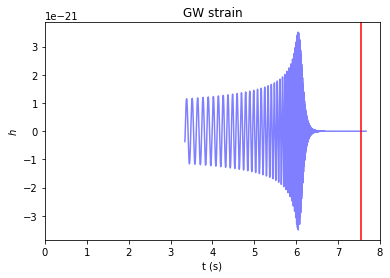

delta_tau=1.94792, post-merger length=1.5525493775 seconds


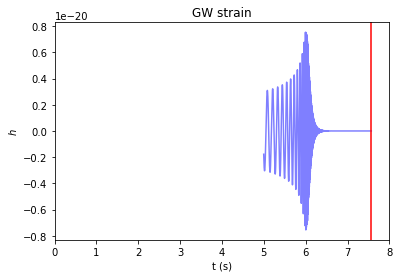

delta_tau=1.95835, post-merger length=1.6912082585 seconds


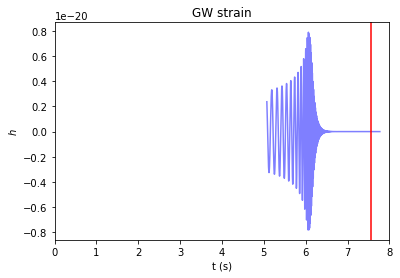

delta_tau=1.87026, post-merger length=1.6093139725 seconds


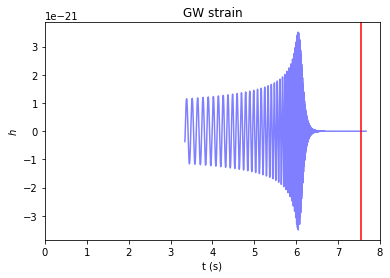

delta_tau=1.94792, post-merger length=1.5525493775 seconds


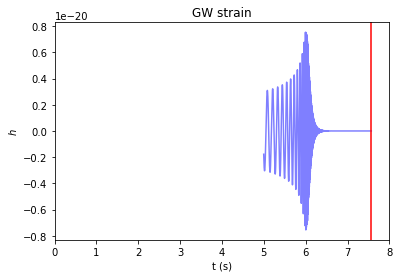

delta_tau=1.47346, post-merger length=1.5697154035 seconds


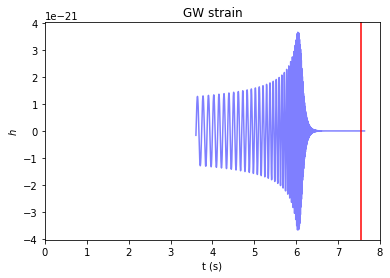

delta_tau=1.99555, post-merger length=1.472767339 seconds


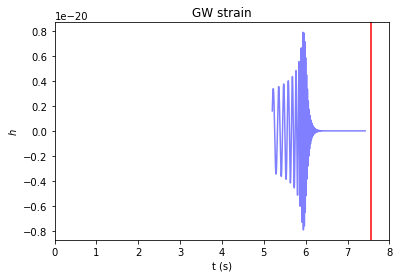

delta_tau=1.82541, post-merger length=1.459071868 seconds


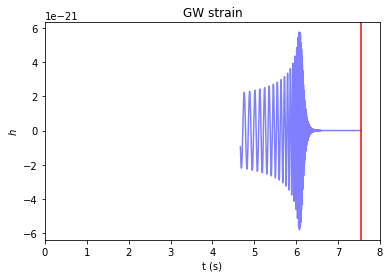

delta_tau=1.94059, post-merger length=1.5332578345 seconds


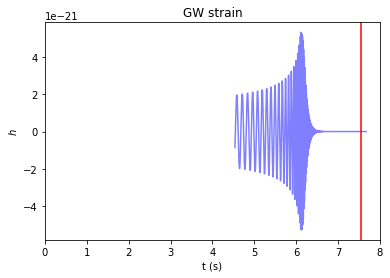

delta_tau=1.645, post-merger length=1.659745678 seconds


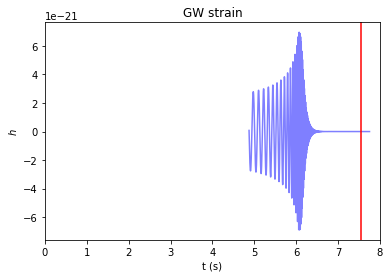

In [391]:
phi_c       = 0.
inclination = 0.
flow=11.
ampO=1.
f_start22   = flow * 2./(ampO+2) #Frequency of the 22 mode at which the signal starts
deltaT      = 1./(1024.)

distance    = 500*(10**6)*lal.PC_SI

maxShift = round(4.255e-2/deltaT)
taperLength = round(0.4/deltaT)

unsafeLength = taperLength + maxShift

for i in range(0,10):
    
    # Define binary parameters
    mchirp     = mchirp_array[i]*lal.MSUN_SI
    q          = q_array[i]

    m1          = mchirp*pow(1. + q,1.0/5.0)*pow(q,-3./5.)
    m2          = m1*q
    
    spin1_z     = a1_array[i]
    spin2_z     = a1_array[i]

    TGRparams_dict = lal.CreateDict()
    lalsimulation.SimInspiralWaveformParamsInsertDOmega220(TGRparams_dict, domega_array[i])
    lalsimulation.SimInspiralWaveformParamsInsertDTau220(TGRparams_dict, dtau_array[i])


    # Generate the waveform
    hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4)

    h = hp.data.data - 1j*hc.data.data
    time_array0 = np.arange(0,len(h)*deltaT,deltaT)+np.float(hp.epoch)
    
    time_array= np.arange(0,len(h)*deltaT,deltaT)+deltaT*(buffstart_array[i]) #time_array0+round(buffend_array[i]-time_array0[-1]/deltaT))

    plt.plot(time_array,  np.real(h), color='b', linestyle='-',alpha=.5)
    print "delta_tau={}, post-merger length={} seconds".format(dtau_array[i],time_array0[-1])
    
    plt.axvline(x=8.-unsafeLength*deltaT,color='red')
    
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain')
    plt.xlim([0,8])
    plt.show()

#### Conclusions: to avoid warning post-merger length cannot be larger than ~1.4 seconds 

## Examples that give seglen warnings (tests)

(194.3998829344102, 79.4181841751946, 1.4753557370000001, 1510.7642746880001)


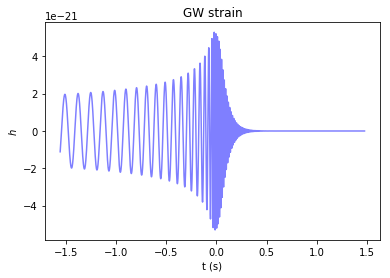

In [301]:
phi_c       = 0.
inclination = 0.
flow=11.
ampO=1.
f_start22   = flow * 2./(ampO+2) #Frequency of the 22 mode at which the signal starts
deltaT      = 1./(1024.)

distance    = 500*(10**6)*lal.PC_SI

#sample 1
spin1_z     = 0.91884
spin2_z     = 0.56552

TGRparams_dict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(TGRparams_dict, -0.18846)
lalsimulation.SimInspiralWaveformParamsInsertDTau220(TGRparams_dict, 1.94059)

        # Define binary parameters
mchirp     = 106.09066*lal.MSUN_SI
q          = 0.40853

m1          = mchirp*pow(1. + q,1.0/5.0)*pow(q,-3./5.)
m2          = m1*q

# Generate the waveform
hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4)

h = hp.data.data - 1j*hc.data.data
time_array = np.arange(0,len(h)*deltaT,deltaT)+np.float(hp.epoch)

plt.plot(time_array,  np.real(h), color='b', linestyle='-',alpha=.5)
print(m1/lal.MSUN_SI,m2/lal.MSUN_SI,time_array[-1],time_array[-1]/deltaT)

plt.ylabel('$h$')
plt.xlabel('t (s)')
plt.title('GW strain')

plt.show()

(198.16133017679883, 89.50154638765295, 1.4605712975, 1495.62500864)


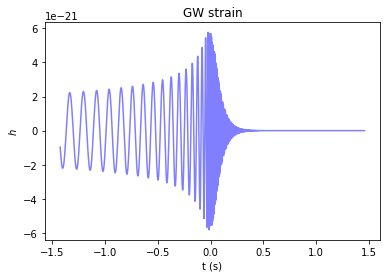

In [287]:
#sample 2
spin1_z     = 0.87301
spin2_z     = 0.88337

TGRparams_dict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(TGRparams_dict, 0.79390)
lalsimulation.SimInspiralWaveformParamsInsertDTau220(TGRparams_dict, 1.82541)

        # Define binary parameters
mchirp     = 114.16498*lal.MSUN_SI
q          = 0.45166

m1          = mchirp*pow(1. + q,1.0/5.0)*pow(q,-3./5.)
m2          = m1*q

# Generate the waveform
hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4)

h = hp.data.data - 1j*hc.data.data
time_array = np.arange(0,len(h)*deltaT,deltaT)+np.float(hp.epoch)

plt.plot(time_array,  np.real(h), color='b', linestyle='-',alpha=.5)
print(m1/lal.MSUN_SI,m2/lal.MSUN_SI,time_array[-1],time_array[-1]/deltaT)

plt.ylabel('$h$')
plt.xlabel('t (s)')
plt.title('GW strain')

plt.show()

(199.60998358581352, 49.47732663141561, 1.5346832345, 1571.515632128)


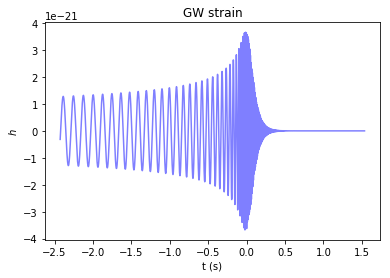

In [282]:
#sample 3
spin1_z     = 0.98679
spin2_z     = 0.71553

TGRparams_dict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(TGRparams_dict, 0.05108)
lalsimulation.SimInspiralWaveformParamsInsertDTau220(TGRparams_dict, 1.47346)

        # Define binary parameters
mchirp     = 82.69567*lal.MSUN_SI
q          = 0.24787

m1          = mchirp*pow(1. + q,1.0/5.0)*pow(q,-3./5.)
m2          = m1*q

# Generate the waveform
hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4)

h = hp.data.data - 1j*hc.data.data
time_array = np.arange(0,len(h)*deltaT,deltaT)+np.float(hp.epoch)

plt.plot(time_array,  np.real(h), color='b', linestyle='-',alpha=.5)
print(m1/lal.MSUN_SI,m2/lal.MSUN_SI,time_array[-1],time_array[-1]/deltaT)

plt.ylabel('$h$')
plt.xlabel('t (s)')
plt.title('GW strain')

plt.show()

In [302]:
waveLength = len(h)
bufLength = 8./deltaT

maxShift = round(4.255e-2/deltaT)
taperLength = round(0.4/deltaT)

unsafeLength = taperLength + maxShift

#desiredTc = 1213323.212804
#tStart = 0
#tEnd = tStart + deltaT * 8./deltaT

#tcSample = round((desiredTc - np.float(hp.epoch))/deltaT)
tcSample=6243
#tcSample=6243
#tcSample= 6179

#injTc = np.float(hp.epoch) + tcSample*deltaT
injTc = 1242442967.546680
#injTc= 1242442967.546680
#injTc= 1242442967.484180

waveTcSample = round(-np.float(hp.epoch)/deltaT)

wavePostTc = waveLength - waveTcSample

 #   size_t bufStartIndex = (tcSample >= waveTcSample ? tcSample - waveTcSample : 0);
bufStartIndex = tcSample - waveTcSample if tcSample >= waveTcSample else 0

 #   size_t bufEndIndex = (wavePostTc + tcSample <= bufLength ? wavePostTc + tcSample : bufLength);
bufEndIndex = wavePostTc + tcSample if wavePostTc + tcSample <= bufLength else bufLength

bufWaveLength = bufEndIndex - bufStartIndex

 #   size_t waveStartIndex = (tcSample >= waveTcSample ? 0 : waveTcSample - tcSample);
waveStartIndex = 0 if tcSample >= waveTcSample else waveTcSample - tcSample


In [303]:
print(injTc,bufStartIndex, bufEndIndex, bufWaveLength, 
      waveStartIndex, bufLength, unsafeLength, taperLength, maxShift)

(1242442967.54668, 4648.0, 7755.0, 3107.0, 0, 8192.0, 454.0, 410.0, 44.0)


bufStartIndex < unsafeLength || (bufLength - bufEndIndex) <= unsafeLength

In [221]:
8192*deltaT

8.0

## Check lenght of pSEOB using prior

In [72]:
#this hdf5 file contains samples from a high temperature chain, so effectively the samples are drawn from the prior
f=h5py.File('samples.hdf5.07','r')
list(f['lalinference/lalinference_mcmc/'].keys())

[u'chain_07']

In [76]:
len(f['lalinference/lalinference_mcmc/chain_07']['chirpmass'])

919

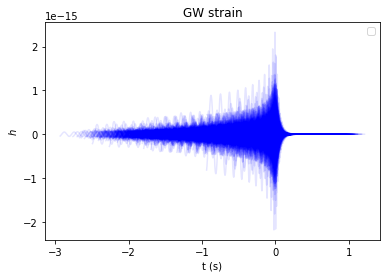

In [77]:
phi_c       = 0.
inclination = 0.
flow=11.
ampO=1.
f_start22   = flow * 2./(ampO+2) #Frequency of the 22 mode at which the signal starts
deltaT      = 1./(1024.)

for i in range(0,len(f['lalinference/lalinference_mcmc/chain_07']['chirpmass'])):

    # Define binary parameters
    mchirp          = f['lalinference/lalinference_mcmc/chain_07']['chirpmass'][i]*lal.MSUN_SI
    q          = f['lalinference/lalinference_mcmc/chain_07']['q'][i]

    m1          = (mchirp*pow(1 + q,1./5.))/pow(q,3./5.)
    m2          = mchirp*pow(q,2./5.)*pow(1 + q,1./5.)
 #   print(m1/(lal.MSUN_SI),m2/(lal.MSUN_SI))
    spin1_z     = f['lalinference/lalinference_mcmc/chain_07']['a_spin1'][i]
    spin2_z     = f['lalinference/lalinference_mcmc/chain_07']['a_spin2'][i]

    distance    = np.exp(f['lalinference/lalinference_mcmc/chain_07']['logdistance'][i])*lal.PC_SI

    TGRparams_dict = lal.CreateDict()
    lalsimulation.SimInspiralWaveformParamsInsertDOmega220(TGRparams_dict, f['lalinference/lalinference_mcmc/chain_07']['domega220'][i])
    lalsimulation.SimInspiralWaveformParamsInsertDTau220(TGRparams_dict,  f['lalinference/lalinference_mcmc/chain_07']['dtau220'][i])

    # Generate the waveform
    hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4HM)

    h = hp.data.data - 1j*hc.data.data
    time_array = np.arange(0,len(h)*deltaT,deltaT)+np.float(hp.epoch)

    plt.plot(time_array,  np.real(h), color='b', linestyle='-',alpha=0.1)
    #plt.plot(time_array, -np.imag(h), color='b', label='h_x')
    plt.xlabel('t')
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain')
    plt.legend()
    #plt.xlim([3.6,4])
    #plt.ylim([-1e-14,1e-14])

plt.legend()
#plt.xlim([0,8])
plt.show()

## Check lenght for SEOB (i.e. GR waveform) using samples above.

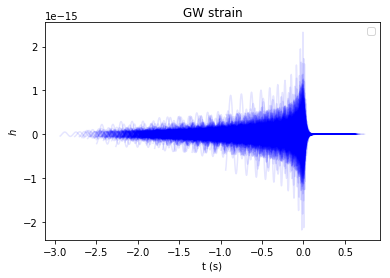

In [78]:
phi_c       = 0.
inclination = 0.
flow=11.
ampO=1.
f_start22   = flow * 2./(ampO+2) #Frequency of the 22 mode at which the signal starts
deltaT      = 1./(1024.)

for i in range(0,len(f['lalinference/lalinference_mcmc/chain_07']['chirpmass'])):

    # Define binary parameters
    mchirp          = f['lalinference/lalinference_mcmc/chain_07']['chirpmass'][i]*lal.MSUN_SI
    q          = f['lalinference/lalinference_mcmc/chain_07']['q'][i]

    m1          = (mchirp*pow(1 + q,1./5.))/pow(q,3./5.)
    m2          = mchirp*pow(q,2./5.)*pow(1 + q,1./5.)
 #   print(m1/(lal.MSUN_SI),m2/(lal.MSUN_SI))
    spin1_z     = f['lalinference/lalinference_mcmc/chain_07']['a_spin1'][i]
    spin2_z     = f['lalinference/lalinference_mcmc/chain_07']['a_spin2'][i]

    distance    = np.exp(f['lalinference/lalinference_mcmc/chain_07']['logdistance'][i])*lal.PC_SI

    # Create the dictionary containing TGR deviations and add a deviation domega220=1.0
    TGRparams_dict = lal.CreateDict()

    # Generate the waveform
    hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4HM)

    h = hp.data.data - 1j*hc.data.data
    time_array = np.arange(0,len(h)*deltaT,deltaT)+np.float(hp.epoch)

    #plt.subplot(223)
    plt.plot(time_array,  np.real(h), color='b', linestyle='-',alpha=0.1)
    #plt.plot(time_array, -np.imag(h), color='b', label='h_x')
    plt.xlabel('t')
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain')
    plt.legend()
    #plt.xlim([3.6,4])
    #plt.ylim([-1e-14,1e-14])

plt.legend()
#plt.xlim([0,8])
plt.show()

In [79]:
h

array([-9.45568820e-17+3.02616364e-17j, -9.31100066e-17+3.44902498e-17j,
       -9.14738139e-17+3.86506476e-17j, ...,
       -0.00000000e+00+0.00000000e+00j, -0.00000000e+00+0.00000000e+00j,
       -0.00000000e+00+0.00000000e+00j])